In [5]:
import sys
import os
base_path = os.getcwd()
sys.path.insert(0, os.path.join(base_path, '..', '..','..')) # location of src

from ecog.decoder.feature_transformation import *

import h5py
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
lp = os.path.join(base_path, '..', '..',
                  'data', 'preprocessed_data', 'cikk',
                  'HTNet_data_03.hdf5')

if os.path.isfile(lp):  # if raw data exist, load it ( otherwise use presaved weights (if exist))
    preprocessed_data = h5py.File(lp, 'r')

    train_x = preprocessed_data['train_x']
    train_y = preprocessed_data['train_y']
    test_x = preprocessed_data['test_x']
    test_y = preprocessed_data['test_y']



pat_ids = {
    'EC01':'a0f66459',
    'EC02':'c95c1e82',
    'EC03':'cb46fd46',
    'EC04':'fcb01f7a',
    'EC05':'ffb52f92',
    'EC06':'b4ac1726',
    'EC07':'f3b79359',
    'EC08':'ec761078',
    'EC09':'f0bbc9a9',
    'EC10':'abdb496b',
    'EC11':'ec168864',
    'EC12':'b45e3f7b'
}

subjects=list(pat_ids.keys())
    # subjects = ['EC07']

lfb = range(7,15)
hfb = range(76,101)

rest_label = 1
move_lavel = 2

In [7]:
def custom_plot(data, title):
    fig = plt.figure(figsize=(5,3.5))
    #fig.patch.set_facecolor('white')
    plt.imshow(data)

    ax = plt.gca()

    # Major ticks
    ax.set_xticks(np.arange(0, 8, 1))
    ax.set_yticks(np.arange(0, 8, 1))

    # Labels for major ticks
    ax.set_xticklabels(np.arange(1, 8+1, 1))
    ax.set_yticklabels(np.arange(1, 8+1, 1))

    # Minor ticks
    ax.set_xticks(np.arange(.5, 8, 1), minor=True)
    ax.set_yticks(np.arange(.5, 8, 1), minor=True)

    # Gridlines based on minor ticks
    ax.grid(which='minor', color='silver', linestyle='--', linewidth=1)
    plt.title(title)
    plt.colorbar()
    plt.show()
    

subject:  EC01 

(feature vector shape) (label vector shape):  (126, 94, 946) (946,)
unique labels:  [1. 2.] 



/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/plotting/displays.py:677: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  axes = figure.add_axes(axes)
/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/plotting/displays.py:1243: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fh.add_axes([0.3 * index * (x1 - x0) + x0, y0,


subject:  EC02 

(feature vector shape) (label vector shape):  (126, 86, 328) (328,)
unique labels:  [1. 2.] 

subject:  EC03 

(feature vector shape) (label vector shape):  (126, 80, 964) (964,)
unique labels:  [1. 2.] 

subject:  EC04 

(feature vector shape) (label vector shape):  (126, 84, 306) (306,)
unique labels:  [1. 2.] 

subject:  EC05 

(feature vector shape) (label vector shape):  (126, 106, 148) (148,)
unique labels:  [1. 2.] 

subject:  EC06 

(feature vector shape) (label vector shape):  (126, 80, 1378) (1378,)
unique labels:  [1. 2.] 

subject:  EC07 

(feature vector shape) (label vector shape):  (126, 64, 1004) (1004,)
unique labels:  [1. 2.] 

subject:  EC08 

(feature vector shape) (label vector shape):  (126, 92, 1344) (1344,)
unique labels:  [1. 2.] 

subject:  EC09 

(feature vector shape) (label vector shape):  (126, 126, 260) (260,)
unique labels:  [1. 2.] 

subject:  EC10 

(feature vector shape) (label vector shape):  (126, 126, 932) (932,)
unique labels:  [1

/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/plotting/displays.py:666: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  figure = plt.figure(figure, figsize=figsize,


subject:  EC12 

(feature vector shape) (label vector shape):  (126, 116, 1512) (1512,)
unique labels:  [1. 2.] 



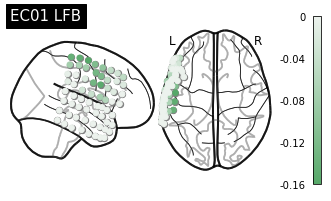

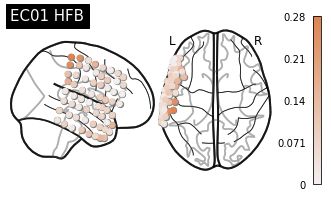

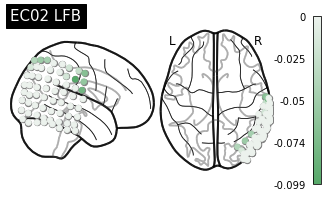

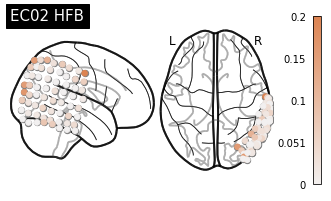

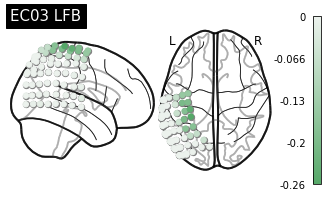

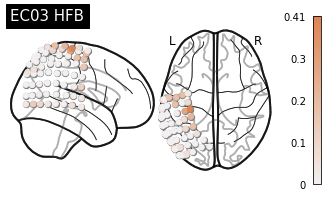

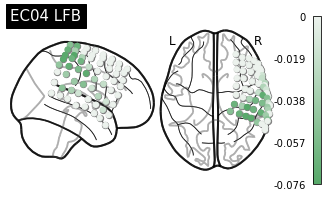

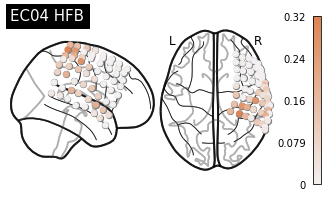

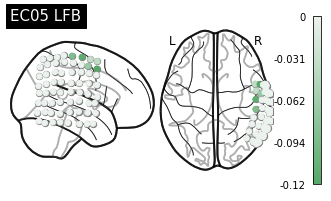

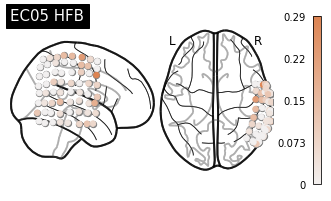

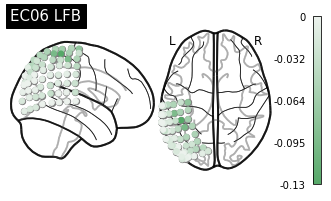

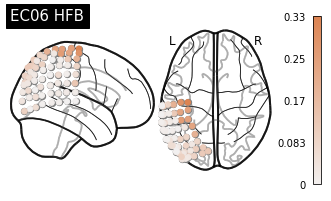

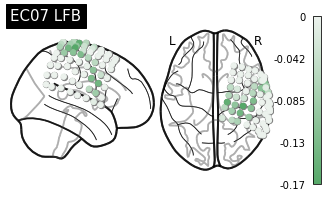

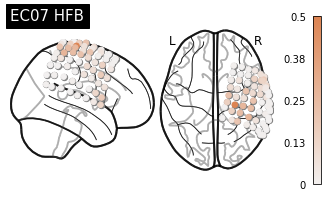

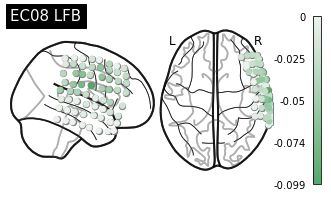

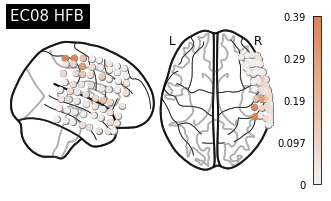

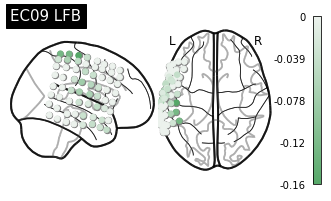

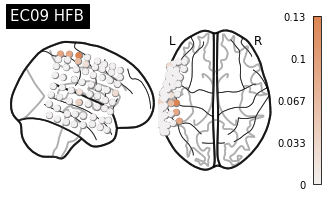

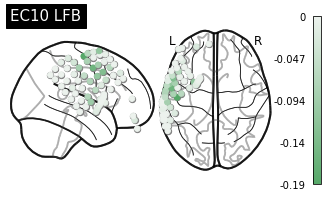

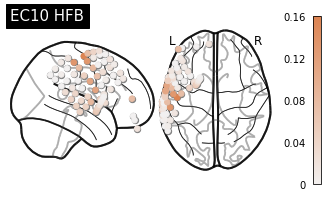

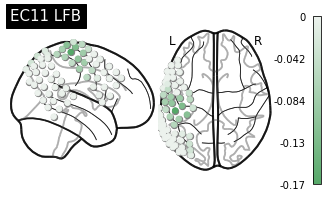

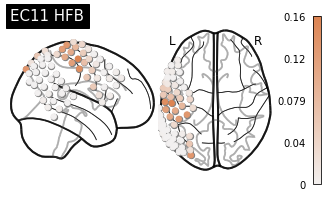

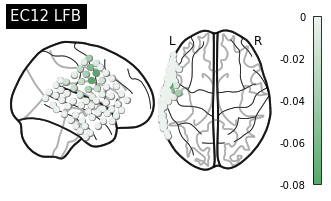

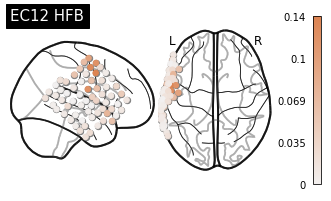

In [8]:
import pandas as pd
import nilearn.plotting as nl

for i, name in enumerate(subjects):
#for i, name in enumerate(['EC01']):
    print('subject: ', subjects[i], '\n')

    # GET r_lfb and r_hfb values
    if os.path.isfile(lp):
        px = np.asarray(train_x[name])
        px = np.transpose(px, axes=[2,1,0])
        py = np.asarray(train_y[name])
        print('(feature vector shape) (label vector shape): ', px.shape, py.shape)
        print('unique labels: ', np.unique(py), '\n')

        ## Normalize data & isolate HFB and LFB

        num_chans = px.shape[1]
        num_trials = px.shape[2]

        px_mean = np.mean(px, axis=2)

        ## Isolate HFB and LFB,

        px_temp = np.divide(px, np.dstack([px_mean]*num_trials))  # normalize data:every datapoint is divided by the average power of the same freq at the same channel
        lfb_trials = squeeze(sum(px_temp[lfb,:,:],0))
        hfb_trials = squeeze(sum(px_temp[hfb,:,:],0))

        ## Comparisons - signed r-squared and unpaired t-test
        #hand=hand v rest, tongue=tongue v rest; r = signed square cross correlation, p=p-value from paired t-test

        r_LFB = []; r_HFB = []
        p_LFB = []; p_HFB = []

        for ch in range(num_chans):
            # extract rest data
            LFB_m1 = lfb_trials[ch, np.where(py == 1)]
            HFB_m1 = hfb_trials[ch, np.where(py == 1)]

            # extract move data
            LFB_1 = lfb_trials[ch, np.where(py == 2)]
            HFB_1 = hfb_trials[ch, np.where(py == 2)]

            # calculate r-squared cross correlation
            r_LFB.append(rsa(LFB_1, LFB_m1))
            r_HFB.append(rsa(HFB_1, HFB_m1))

            # calculate p-value of t-test
            p_LFB.append(float(ttest_ind(LFB_1, LFB_m1, 1)[1]))
            p_HFB.append(float(ttest_ind(HFB_1, HFB_m1, 1)[1]))

        # 'we included only electrodes with changes in power significant at the 0.05 Bonferroni-corrected level'
        r_LFB = np.where(np.asarray(p_LFB)<0.05 , r_LFB, 0)
        r_HFB = np.where(np.asarray(p_HFB)<0.05 , r_HFB, 0)

        if not os.path.exists('suppl_data'):
            os.makedirs('suppl_data')
        np.save(os.path.join('suppl_data', 'r_LFB.npy'), r_LFB)
        np.save(os.path.join('suppl_data', 'r_HFB.npy'), r_HFB)
    else:
        r_LFB = np.load(os.path.join('suppl_data', 'r_LFB.npy'))
        r_HFB = np.load(os.path.join('suppl_data', 'r_HFB.npy'))

    # plot correlation
    '''fig = plt.figure(figsize=[20,4])
    ax = fig.gca()
    ax.set_xticks(np.arange(0, len(r_LFB), 1))
    ax.plot(r_LFB, label='LFB', color='g')
    ax.plot(r_HFB,label='HFB', color='orange')
    ax.plot(p_LFB, label='LFB p-value', color='g', linestyle='dotted')
    ax.plot(p_HFB,label='HFB p-value', color='orange', linestyle='dotted')
    plt.grid()!data/raw_data/naturalistic_move_v_rest/electrode_locations/*

    plt.legend()
    plt.title('correlation')
    plt.show()

    r_LFB_temp = np.asarray(r_LFB[:64]).reshape(8, 8)
    r_HFB_temp = np.asarray(r_HFB[:64]).reshape(8, 8)

    custom_plot(np.abs(r_LFB_temp), 'Low Frequency Band')
    custom_plot(r_HFB_temp, 'High Frequency Band')'''

    # plot on brain
    file = os.path.join(base_path, '..', '..',
                        'data','raw_data', 'naturalistic_move_v_rest',
                        'electrode_locations',
                        'ecog_metadata_{}.csv'.format(pat_ids[name]))
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])
    elec = elec[:64,:]

    #weights = [-1*x for x in r_LFB]
    weights_lfb = [x for x in r_LFB]
    weights_hfb = [x for x in r_HFB]
    w_range = [abs(min(weights_lfb)), abs(max(weights_hfb))]
    w_bound = max(w_range)
    #norm = np.linalg.norm(weights)
    #weights_norm = weights/norm
    #color = [[w, 0, 0, 1] for w in weights]

    nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                       node_coords=elec,
                       node_size=40,
                       alpha=.4,
                       display_mode='xz',
                       node_color='grey',
                       figure=2*i,
                       )

    savedir = os.path.join(base_path, '..', '..',
                                             'analysis', 'move_vs_rest',
                                             'figs', 'correlation',
                                             'LFB_{}.png'.format(name))

    nl.plot_markers(#adjacency_matrix=np.eye(elec.shape[0]),
                    node_coords=elec,
                    node_values=weights_lfb[:64],
                    node_size=30,
                    display_mode='xz',
                    alpha=1,
                    node_cmap=sns.light_palette(sns.color_palette('deep')[2],
                                                n_colors=20,
                                                reverse=True, as_cmap=True,
                                                input='rgb'),
                    #node_vmin= -1*w_bound,
                    node_vmax=0,
                    #output_file=savedir,
                    title=name +' LFB',
                    figure=2*i)
                    #colorbar=True)

    nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                       node_coords=elec,
                       node_size=40,
                       alpha=1,
                       display_mode='xz',
                       node_color='grey',
                       figure=2*i+1,
                       )

    savedir = os.path.join(base_path, '..', '..',
                                         'analysis', 'move_vs_rest',
                                         'figs', 'correlation',
                                         'LFB_{}.png'.format(name))

    nl.plot_markers(#adjacency_matrix=np.eye(elec.shape[0]),
                    node_coords=elec,
                    node_values=weights_hfb[:64],
                    node_size=30,
                    display_mode='xz',
                    alpha=1,
                    node_cmap=sns.light_palette(sns.color_palette('deep')[1],
                                                n_colors=20,
                                                reverse=False, as_cmap=True,
                                                input='rgb'),
                    figure=2*i+1,
                    node_vmin=0,
                    title=name +' HFB',
                    #output_file=savedir
                    #colorbar=True)
    )

    '''nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                       node_coords=elec,
                       node_color=weights[:64],
                       title=name + ' HFB')'''
